<a href="https://colab.research.google.com/github/Overleaff/Image_processing/blob/main/Chap4_2featureExtraction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import cv2
from matplotlib import pyplot as plt
import numpy as np
import math
import os

from skimage.feature import hog
import skimage

from IPython.display import Image

In [ ]:
!pip install opencv-contrib-python==4.4.0.44
print(cv2.__version__)

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 55.7 MB 1.3 MB/s 
  Attempting uninstall: opencv-contrib-python
    Found existing installation: opencv-contrib-python 4.1.2.30
    Uninstalling opencv-contrib-python-4.1.2.30:
      Successfully uninstalled opencv-contrib-python-4.1.2.30


4.1.2


# Global Feature

# HOG

In [ ]:
!curl -O https://raw.githubusercontent.com/Overleaff/image/main/image-stiching/man.png
image_path = "man.png"

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 92891  100 92891    0     0   429k      0 --:--:-- --:--:-- --:--:--  429k


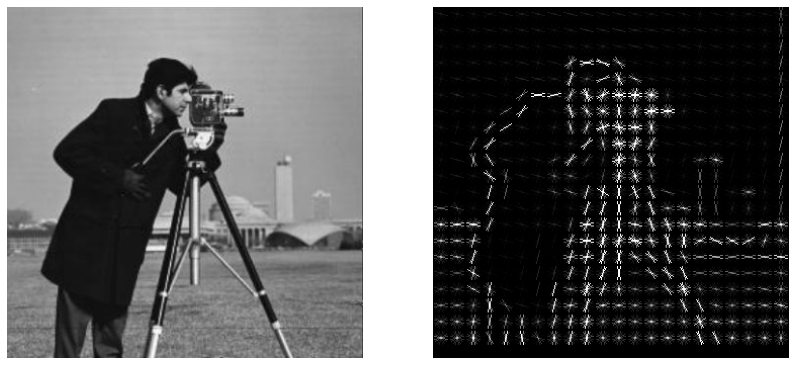

In [ ]:
#Initialize array subplot
size = 2
f, axarr = plt.subplots(1, size) 
f.set_figheight(size * 7)
f.set_figwidth(size * 7)

####
img = cv2.imread(image_path)
axarr[0].axis('off')
axarr[0].imshow(img, cmap='gray')

fd, hog_image = hog(img, orientations=8, pixels_per_cell=(16, 16),
                    cells_per_block=(1, 1), visualize=True, multichannel=True)
hog_image_rescaled = skimage.exposure.rescale_intensity(hog_image, in_range=(0, 10))

axarr[1].axis('off')
axarr[1].imshow(hog_image_rescaled, cmap='gray')

plt.show()

# LoG for scale-space blob detector

In [ ]:
!curl -O https://raw.githubusercontent.com/Overleaff/image/main/animal/butterfly.jpg
image_path1 = "butterfly.jpg"

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100    14  100    14    0     0     69      0 --:--:-- --:--:-- --:--:--    69


In [ ]:
'''
fig, ax = plt.subplots()
im = cv2.imread(image_path1, 0)
ax.imshow(im)

im = cv2.imread(image_path1, 0)

# Setup SimpleBlobDetector parameters.
params = cv2.SimpleBlobDetector_Params()

# Change thresholds
params.minThreshold = 10
params.maxThreshold = 200


# Filter by Area.
params.filterByArea = True
params.minArea = 1500

# Filter by Circularity
params.filterByCircularity = True
params.minCircularity = 0.1

# Filter by Convexity
params.filterByConvexity = True
params.minConvexity = 0.87

# Filter by Inertia
params.filterByInertia = True
params.minInertiaRatio = 0.01

# Create a detector with the parameters
# OLD: detector = cv2.SimpleBlobDetector(params)
detector = cv2.SimpleBlobDetector_create(params)

# Detect blobs.
keypoints = detector.detect(im)

# Draw detected blobs as red circles.
# cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS ensures
# the size of the circle corresponds to the size of blob

im_with_keypoints = cv2.drawKeypoints(im, keypoints, np.array([]), (0,0,255), cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)

fig, ax = plt.subplots()
ax.imshow(im_with_keypoints, cmap='gray')
plt.show()'''

"\nfig, ax = plt.subplots()\nim = cv2.imread(image_path1, 0)\nax.imshow(im)\n\nim = cv2.imread(image_path1, 0)\n\n# Setup SimpleBlobDetector parameters.\nparams = cv2.SimpleBlobDetector_Params()\n\n# Change thresholds\nparams.minThreshold = 10\nparams.maxThreshold = 200\n\n\n# Filter by Area.\nparams.filterByArea = True\nparams.minArea = 1500\n\n# Filter by Circularity\nparams.filterByCircularity = True\nparams.minCircularity = 0.1\n\n# Filter by Convexity\nparams.filterByConvexity = True\nparams.minConvexity = 0.87\n\n# Filter by Inertia\nparams.filterByInertia = True\nparams.minInertiaRatio = 0.01\n\n# Create a detector with the parameters\n# OLD: detector = cv2.SimpleBlobDetector(params)\ndetector = cv2.SimpleBlobDetector_create(params)\n\n# Detect blobs.\nkeypoints = detector.detect(im)\n\n# Draw detected blobs as red circles.\n# cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS ensures\n# the size of the circle corresponds to the size of blob\n\nim_with_keypoints = cv2.drawKeypoints(im, 

# SIFT

In [ ]:
!curl -O https://raw.githubusercontent.com/Overleaff/image/main/animal/butterfly.png
image_path = "butterfly.png"

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  136k  100  136k    0     0   583k      0 --:--:-- --:--:-- --:--:--  580k


In [ ]:
img = cv2.imread(image_path,0)

sift = cv2.xfeatures2d.SIFT_create() 
kp = sift.detect(img, None)
  
# Marking the keypoint on the image using circles
img=cv2.drawKeypoints(img ,
                      kp ,
                      img ,
                      flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)
  
cv2.imwrite('image-with-keypoints.jpg', img)

cv2.imwrite('sift_keypoints.jpg',img)
Image('sift_keypoints.jpg')

error: ignored

# Matching

In [ ]:
!curl -O https://raw.githubusercontent.com/Overleaff/image/main/image-stiching/thaprua.jpg
image_path1 = "thaprua.jpg"
!curl -O https://raw.githubusercontent.com/Overleaff/image/main/image-stiching/thaprua2.jpg
image_path2 = "thaprua2.jpg"
!curl -O https://raw.githubusercontent.com/Overleaff/image/main/animal/butterfly.png
image_path3 = "butterfly.png"

#Initialize array subplot
size = 3
f, axarr = plt.subplots(1, size) 
f.set_figheight(size * 7)
f.set_figwidth(size * 7)

####
img1 = cv2.imread(image_path1)

axarr[0].axis('off')
img1 = cv2.cvtColor(img1, cv2.COLOR_RGB2BGR)
axarr[0].imshow(img1)

img2 = cv2.imread(image_path2)
img2 = cv2.cvtColor(img2, cv2.COLOR_RGB2BGR)
axarr[1].axis('off')
axarr[1].imshow(img2)

img3 = cv2.imread(image_path3)
img3 = cv2.cvtColor(img3, cv2.COLOR_RGB2BGR)
axarr[2].axis('off')
axarr[2].imshow(img3)
plt.show()

In [ ]:
sift = cv2.xfeatures2d.SIFT_create()
kp1, des1 = sift.detectAndCompute(img1,None)
kp2, des2 = sift.detectAndCompute(img2,None)
#kp2, des2 = sift.detectAndCompute(img3,None)
'''
FLANN_INDEX_KDTREE = 1
index_params = dict(algorithm = FLANN_INDEX_KDTREE, trees = 5)
search_params = dict(checks=50)

flann = cv2.FlannBasedMatcher(index_params,search_params)

matches = flann.knnMatch(des1,des2,k=2)

cnt = 0
matchesMask = [[0,0] for i in range(len(matches))]
for i,(m,n) in enumerate(matches):
    if m.distance < 0.7*n.distance:
        matchesMask[i]=[1,0]
        cnt += 1
        
print("Number of matchesMask: " + str(cnt))

draw_params = dict(matchColor = (0,255,0),
                   singlePointColor = (255,0,0),
                   matchesMask = matchesMask,
                   flags = 0)

imgRes = cv2.drawMatchesKnn(img1,kp1,img2,kp2,matches,None,**draw_params)
#imgRes = cv2.drawMatchesKnn(img1,kp1,img3,kp2,matches,None,**draw_params)
plt.subplots(1, 1, figsize = (15,12))
plt.imshow(imgRes),plt.show()
'''
bf = cv2.BFMatcher(cv2.NORM_L2, crossCheck=False)

## Bruce Force KNN trả về list gồm k ứng viên cho mỗi keypoint. 
rawMatches = bf.knnMatch(des1, des2, 2)
matches = []
ratio = 0.75

for m,n in rawMatches:
    # giữ lại các cặp keypoint sao cho với kp1, khoảng cách giữa kp1 với ứng viên 1 nhỏ hơn nhiều so với khoảng cách giữa kp1 và ứng viên 2
    if m.distance < n.distance * 0.75:
        matches.append(m)

# do có cả nghìn match keypoint, ta chỉ lấy tầm 100 -> 200 cặp tốt nhất để tốc độ xử lí nhanh hơn
matches = sorted(matches, key=lambda x: x.distance, reverse=True)
matches = matches[:200]

img3 = cv2.drawMatches(img1, kp1, img2, kp2, matches, None,flags=cv2.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS)
plt.subplots(1, 1, figsize = (15,12))
plt.imshow(img3),plt.show()


# stitch matching

In [ ]:
kp1 = np.float32([kp.pt for kp in kp1])
kp2 = np.float32([kp.pt for kp in kp2])
pts1 = np.float32([kp1[m.queryIdx] for m in matches])
pts2 = np.float32([kp2[m.trainIdx] for m in matches])

# estimate the homography between the sets of points
(H, status) = cv2.findHomography(pts1, pts2, cv2.RANSAC)
print(H)

In [ ]:
h1, w1 = img1.shape[:2]
h2, w2 = img2.shape[:2]
result = cv2.warpPerspective(img1, H, (w1+w2, h1))
result[0:h2, 0:w2] = img2

plt.subplots(1, 1, figsize = (15,12))
plt.imshow(result)

plt.show()

# Image Stitching

In [ ]:
!curl -O https://raw.githubusercontent.com/Overleaff/image/main/image-stiching/panorama/outside1.jpg
image_path1 = "outside1.jpg"
!curl -O https://raw.githubusercontent.com/Overleaff/image/main/image-stiching/panorama/outside2.jpg
image_path2 = "outside2.jpg"
!curl -O https://raw.githubusercontent.com/Overleaff/image/main/image-stiching/panorama/outside3.jpg
image_path3 = "outside3.jpg"
!curl -O https://raw.githubusercontent.com/Overleaff/image/main/image-stiching/panorama/outside4.jpg
image_path4 = "outside4.jpg"
!curl -O https://raw.githubusercontent.com/Overleaff/image/main/image-stiching/panorama/outside5.jpg
image_path5 = "outside5.jpg"

size = 5
f, axarr = plt.subplots(1, size) 
f.set_figheight(size * 7)
f.set_figwidth(size * 7)

####
img1 = cv2.imread(image_path1)

axarr[0].axis('off')
axarr[0].imshow(img1)

img2 = cv2.imread(image_path2)
axarr[1].axis('off')
axarr[1].imshow(img2)

img3 = cv2.imread(image_path3)
axarr[2].axis('off')
axarr[2].imshow(img3)

img4 = cv2.imread(image_path4)
axarr[3].axis('off')
axarr[3].imshow(img4)

img5 = cv2.imread(image_path5)
axarr[4].axis('off')
axarr[4].imshow(img5)

plt.show()

In [ ]:
stitchy = cv2.Stitcher.create()
output = stitchy.stitch((img1, img2), showMatches=True)

print(output)

fig, ax = plt.subplots()
ax.imshow(output)
plt.show()